In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [2]:
data=pd.read_csv("traffic.csv",parse_dates=True)

# New Section

In [3]:
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [4]:
data=data.set_index(['DateTime'])
data = data.drop(columns=['ID', 'Junction'])


In [5]:
from datetime import datetime
data.head()

,Vehicles
DateTime,
2015-11-01 00:00:00,15
2015-11-01 01:00:00,13
2015-11-01 02:00:00,10
2015-11-01 03:00:00,7
2015-11-01 04:00:00,9


In [6]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean, rolstd)

                      Vehicles
DateTime                      
2015-11-01 00:00:00        NaN
2015-11-01 01:00:00        NaN
2015-11-01 02:00:00        NaN
2015-11-01 03:00:00        NaN
2015-11-01 04:00:00        NaN
...                        ...
2017-06-30 19:00:00  12.083333
2017-06-30 20:00:00  14.166667
2017-06-30 21:00:00  14.916667
2017-06-30 22:00:00  15.500000
2017-06-30 23:00:00  15.333333

[48120 rows x 1 columns]                      Vehicles
DateTime                     
2015-11-01 00:00:00       NaN
2015-11-01 01:00:00       NaN
2015-11-01 02:00:00       NaN
2015-11-01 03:00:00       NaN
2015-11-01 04:00:00       NaN
...                       ...
2017-06-30 19:00:00  3.848455
2017-06-30 20:00:00  5.890413
2017-06-30 21:00:00  5.451577
2017-06-30 22:00:00  5.823151
2017-06-30 23:00:00  5.898125

[48120 rows x 1 columns]


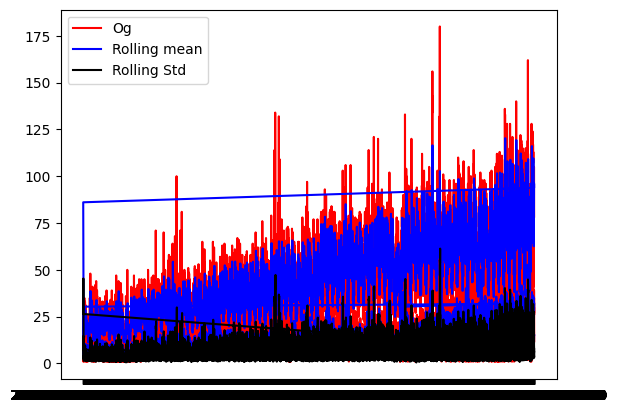

In [7]:
#rolling stat
orginal=plt.plot(data, color='red', label ='Og')
mean=plt.plot(rolmean, color='blue', label="Rolling mean")
std=plt.plot(rolstd, color='black', label="Rolling Std")
plt.legend(loc='best')
plt.show()




In [8]:
def plot_graph(timeseries):
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()

    orginal = plt.plot(timeseries, color='red', label ='Og')
    mean = plt.plot(rolmean, color='blue', label="Rolling mean")
    std = plt.plot(rolstd, color='black', label="Rolling Std")

    plt.legend(loc='best')
    plt.title('Timeseries data with rolling mean and standard deviation')
    plt.show()


In [9]:
def adcf_test(timeseries):
    from statsmodels.tsa.stattools import adfuller
    dftest=adfuller(timeseries)
    print(dftest)

In [10]:
adcf_test(data)

(-7.518278111935721, 3.851060199915586e-11, 57, 48062, {'1%': -3.430486066940443, '5%': -2.8616001387397922, '10%': -2.566802009871527}, 276495.72182130534)


In [11]:
def test_stationarity(timeseries):
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()

    orginal = plt.plot(timeseries, color='red', label ='Og')
    mean = plt.plot(rolmean, color='blue', label="Rolling mean")
    std = plt.plot(rolstd, color='black', label="Rolling Std")

    plt.legend(loc='best')
    plt.title('Timeseries data with rolling mean and standard deviation')
    plt.show()
    from statsmodels.tsa.stattools import adfuller
    dftest=adfuller(timeseries)
    dfoutput=pd.Series(dftest[0:4],index=['The test Statistic','Mackinnons approximate p-value','#usedlags','NOBS'])
    print(dfoutput)


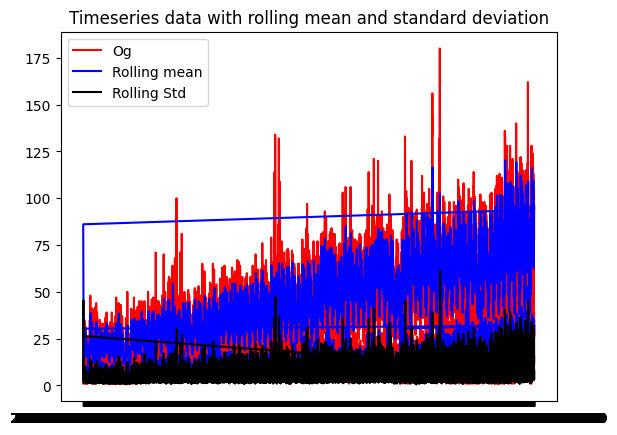

The test Statistic               -7.518278e+00
Mackinnons approximate p-value    3.851060e-11
#usedlags                         5.700000e+01
NOBS                              4.806200e+04
dtype: float64


In [12]:
test_stationarity(data)

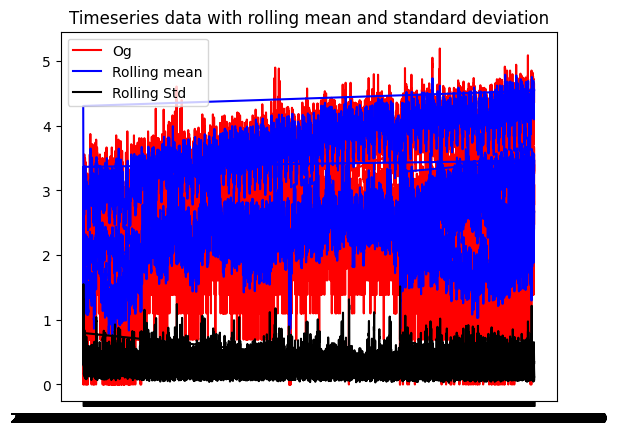

The test Statistic               -6.927663e+00
Mackinnons approximate p-value    1.104629e-09
#usedlags                         5.700000e+01
NOBS                              4.806200e+04
dtype: float64


In [13]:
import numpy as np
data_log_scaled=np.log(data)
test_stationarity(data_log_scaled)

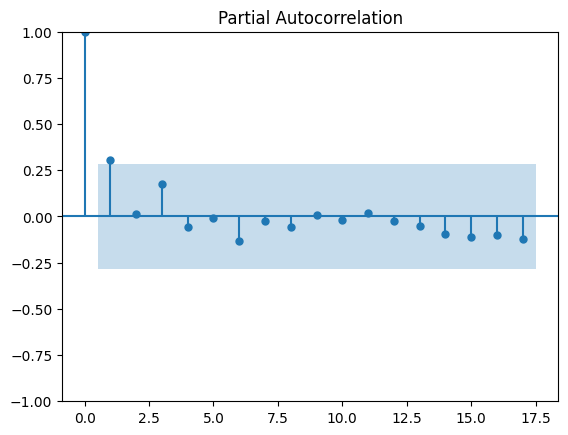

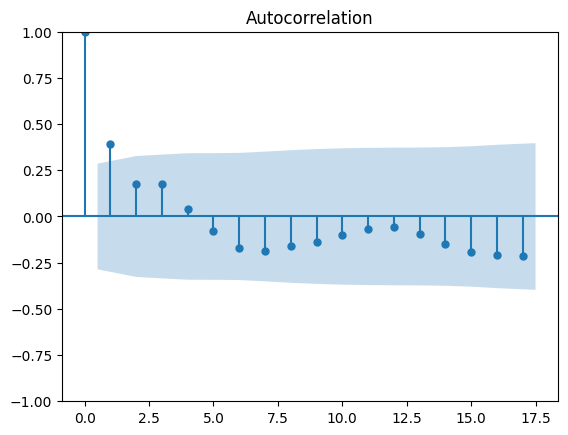

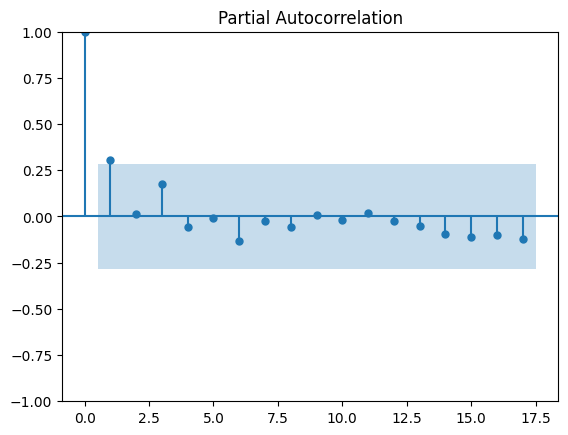

In [28]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

lag_acf = acf(data_log_scaled_minus_ma)
lag_pacf = pacf(data_log_scaled_minus_ma)

plot_acf(lag_acf)
plot_pacf(lag_pacf)


In [36]:
from statsmodels.tsa.arima.model import ARIMA

from sklearn.model_selection import train_test_split


train,test=train_test_split(data_log_scaled,test_size=0.10, shuffle = False)

model_arima= ARIMA(train, order=(20,2,2))

model_arima_fit = model_arima.fit()


predictions= model_arima_fit.predict(len(test))

predictions = predictions[:len(test)]



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
test.head()

,Vehicles
DateTime,
2017-06-11 12:00:00,17
2017-06-11 13:00:00,13
2017-06-11 14:00:00,9
2017-06-11 15:00:00,11
2017-06-11 16:00:00,12


In [37]:
test.mean()

Vehicles    1.952324
dtype: float64

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt

error=mean_squared_error(test,predictions)
rmse=sqrt(error)

print('Test RMSE %.3f' %rmse)

Test RMSE 1.870


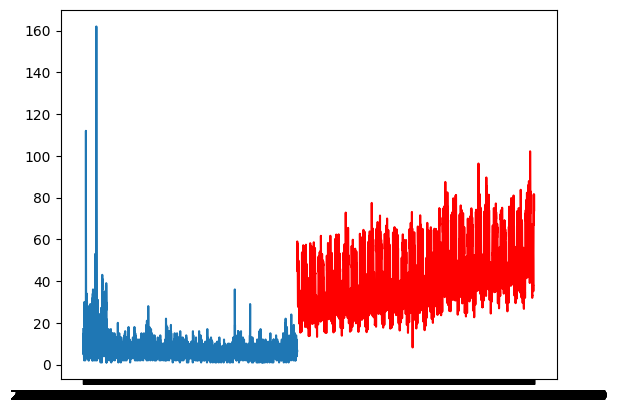

In [39]:
predict= np.exp(predictions)
test_set=np.exp(test)

plt.plot(test_set)
plt.plot(predict,color='red')
plt.show()

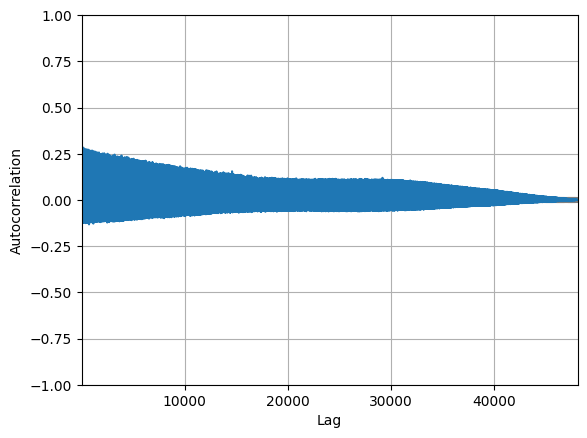

In [40]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data_log_scaled_minus_ma)
plt.show()

<Axes: ylabel='Density'>

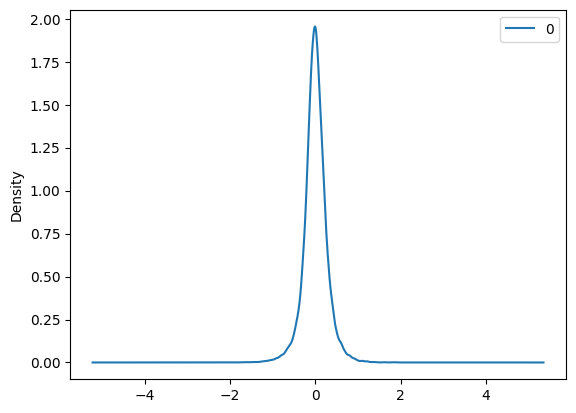

In [35]:
from pandas import DataFrame

residual=DataFrame(model_arima_fit.resid)

residual.plot(kind='kde')
